#Uvod u znanost o podacima (UZOP) - Projekt 

In [496]:
import pandas as pd
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#### 1. Učitavanje podataka

In [497]:
import pandas as pd

assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')


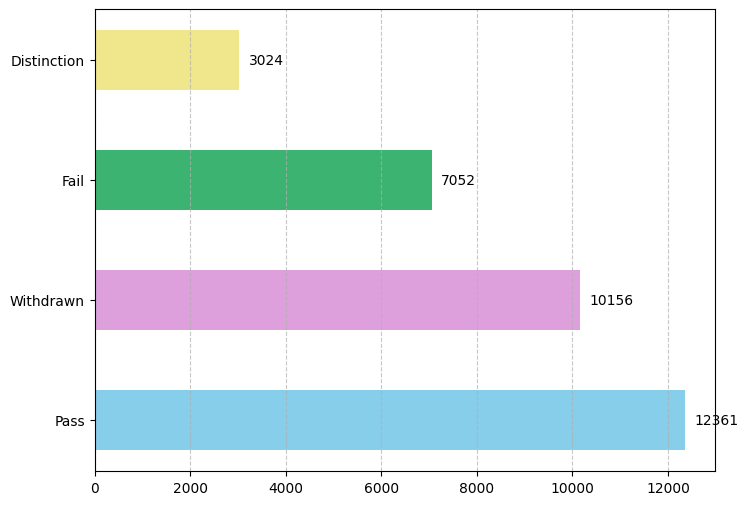

In [498]:
final_result_counts = studentInfo['final_result'].value_counts()
categories = final_result_counts.index.tolist()
values = final_result_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.barh(categories, values, color=['skyblue', 'plum', 'mediumseagreen', 'khaki'], height=0.5)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, value in enumerate(values):
    plt.text(value + 200, i, str(value), va='center', fontsize=10)

plt.show()


##### Konstante značajke

In [499]:
print(assessments.columns[assessments.nunique() == 1])
print(courses.columns[courses.nunique() == 1])
print(studentAssessment.columns[studentAssessment.nunique() == 1])
print(studentInfo.columns[studentInfo.nunique() == 1])
print(studentRegistration.columns[studentRegistration.nunique() == 1])
print(studentVle.columns[studentVle.nunique() == 1])
print(vle.columns[vle.nunique() == 1])

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


##### Neodostajuće vrijednosti

In [500]:
# tablica assessments
print(assessments.describe())

assessments["date"] = assessments.groupby(['code_module', 'code_presentation'])["date"].transform(
    lambda x: x.fillna(x.mean().round()).astype(int) + (x.isnull() * np.random.normal(0, 0.1 * x.std(), len(x)).round().astype(int))
)

       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000


In [501]:
# nema nedostajućih vrijednosti za courses i studentVle
print(courses.isna().sum())
print(studentVle.isna().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [502]:
# nedostajuće vrijednosti za studentAssessment
print(studentAssessment.isna().sum())
print(studentAssessment.shape)

print(studentAssessment.describe())
studentAssessment = studentAssessment.dropna(subset=['score'])

print(studentAssessment.isna().sum())
print(studentAssessment.shape)

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
(173912, 5)
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  
id_assessment     0
id_student      

In [503]:
# nedostajuće vrijednosti za tablicu studentInfo
print(studentInfo.isna().sum()) 
print(studentInfo.describe())

#studentInfo.drop(('imd_band'), axis=1, inplace=True)
def fill_random_weighted(series):
    value_counts = series.dropna().value_counts()
    return np.random.choice(value_counts.index, p=value_counts.values / value_counts.sum())

studentInfo['imd_band'] = studentInfo.groupby('region')['imd_band'].transform(
    lambda x: x.fillna(fill_random_weighted(x)))

print(studentInfo.isna().sum())


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000
code_module             0
code_presentation       0
id_student              0
gender                  0
regi

In [504]:
# nedostajuće vrijednosti za tablicu studentRegistration
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [505]:
# uklanjamo date_unregistration jer ima puno nedostajućih vrijednosti, a ne daje nam korisnu informaciju
studentRegistration.drop(('date_unregistration'), axis=1, inplace=True)

In [506]:
studentRegistration.describe()

,id_student,date_registration
count,3.259300e+04,32548.000000
mean,7.066877e+05,-69.411300
std,5.491673e+05,49.260522
min,3.733000e+03,-322.000000
25%,5.085730e+05,-100.000000
50%,5.903100e+05,-57.000000
75%,6.444530e+05,-29.000000
max,2.716795e+06,167.000000


In [507]:
 # za date_registration imamo outliere pa cemo koristiti median sa šumom za nadopunu podataka
studentRegistration['date_registration'] = studentRegistration['date_registration'].transform(
    lambda x: x.fillna(x.median()) + (x.isnull() * np.random.normal(0, 0.1 * x.std())))
#studentRegistration = studentRegistration.dropna(subset=['date_registration'])

In [508]:
studentRegistration.describe()

,id_student,date_registration
count,3.259300e+04,32593.000000
mean,7.066877e+05,-69.395585
std,5.491673e+05,49.228318
min,3.733000e+03,-322.000000
25%,5.085730e+05,-100.000000
50%,5.903100e+05,-57.000000
75%,6.444530e+05,-29.000000
max,2.716795e+06,167.000000


In [509]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [510]:
vle.shape[0]

6364

In [511]:
# week_from i week_to imaju 5243 nedostajuće vrijednosti, a tablica ima ukupno 6364 redaka, zaključujem da je ne pruzaju dovoljno korisnu informaciju
# pa ih uklanjam
vle.drop(('week_from'), axis=1, inplace=True)
vle.drop(('week_to'), axis=1, inplace=True)
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


##### Transformacija kategoričkih značajki u numeričke

In [512]:
gender_mapping = {
    'M': 0,
    'F': 1
}

highest_education_mapping = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}

imd_band_mapping = {
    '0-10%': 0, 
    '10-20': 1, 
    '20-30%': 2,
    '30-40%': 3,
    '40-50%': 4,
    '50-60%': 5,
    '60-70%': 6,
    '70-80%': 7,
    '80-90%': 8,
    '90-100%': 9
}


age_band_mapping = {
    '0-35': 0,
    '35-55': 1,
    '55<=': 2
}

disability_mapping = {
    'N': 0, 
    'Y': 1 
}

In [513]:
studentInfo['gender'] = studentInfo["gender"].map(gender_mapping)
studentInfo['highest_education'] = studentInfo['highest_education'].map(highest_education_mapping)
studentInfo['imd_band'] = studentInfo['imd_band'].map(imd_band_mapping)
studentInfo['age_band'] = studentInfo['age_band'].map(age_band_mapping)
studentInfo['disability'] = studentInfo['disability'].map(disability_mapping)

studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,0,East Anglian Region,3,9,2,0,240,0,Pass
1,AAA,2013J,28400,1,Scotland,3,2,1,0,60,0,Pass
2,AAA,2013J,30268,1,North Western Region,2,3,1,0,60,1,Withdrawn
3,AAA,2013J,31604,1,South East Region,2,5,1,0,60,0,Pass
4,AAA,2013J,32885,1,West Midlands Region,1,5,0,0,60,0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,1,Wales,1,1,0,0,30,0,Fail
32589,GGG,2014J,2645731,1,East Anglian Region,1,4,1,0,30,0,Distinction
32590,GGG,2014J,2648187,1,South Region,2,2,0,0,30,1,Pass
32591,GGG,2014J,2679821,1,South East Region,1,9,1,0,30,0,Withdrawn


In [514]:
categorical_columns = ['region']
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data = encoder.fit_transform(studentInfo[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
studentInfo = pd.concat([studentInfo.drop(columns=categorical_columns), encoded_df], axis=1)

studentInfo.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,AAA,2013J,11391,0,3,9,2,0,240,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,1,3,2,1,0,60,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,1,2,3,1,0,60,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,1,2,5,1,0,60,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,1,1,5,0,0,60,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [515]:
vle['activity_type'].unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

In [516]:
# transformacije za tablicu vle
categorical_columns = ['activity_type']
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data = encoder.fit_transform(vle[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
vle = pd.concat([vle.drop(columns=categorical_columns), encoded_df], axis=1)

vle.head()

,id_site,code_module,code_presentation,activity_type_dataplus,activity_type_dualpane,activity_type_externalquiz,activity_type_folder,activity_type_forumng,activity_type_glossary,activity_type_homepage,...,activity_type_ouelluminate,activity_type_ouwiki,activity_type_page,activity_type_questionnaire,activity_type_quiz,activity_type_repeatactivity,activity_type_resource,activity_type_sharedsubpage,activity_type_subpage,activity_type_url
0,546943,AAA,2013J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,546712,AAA,2013J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,546998,AAA,2013J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,546888,AAA,2013J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,547035,AAA,2013J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [517]:
assessments['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [518]:
categorical_columns = ['assessment_type']
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data = encoder.fit_transform(assessments[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
assessments = pd.concat([assessments.drop(columns=categorical_columns), encoded_df], axis=1)

assessments.head()

,code_module,code_presentation,id_assessment,date,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,AAA,2013J,1752,19,10.0,0.0,0.0,1.0
1,AAA,2013J,1753,54,20.0,0.0,0.0,1.0
2,AAA,2013J,1754,117,20.0,0.0,0.0,1.0
3,AAA,2013J,1755,166,20.0,0.0,0.0,1.0
4,AAA,2013J,1756,215,30.0,0.0,0.0,1.0


In [519]:
merged_data = pd.merge(studentInfo, studentRegistration)

In [520]:
merged_data.shape

(32593, 25)

In [521]:
merged_data.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,date_registration
0,AAA,2013J,11391,0,3,9,2,0,240,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-159.0
1,AAA,2013J,28400,1,3,2,1,0,60,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.0
2,AAA,2013J,30268,1,2,3,1,0,60,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-92.0
3,AAA,2013J,31604,1,2,5,1,0,60,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-52.0
4,AAA,2013J,32885,1,1,5,0,0,60,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-176.0


In [522]:
merged_data.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result',
       'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'date_registration'],
      dtype='object')

In [523]:
merged_data.drop(['studied_credits'], axis=1, inplace=True)

In [524]:
clicks_till_start = studentVle[studentVle["date"] <= 0]

In [525]:
clicks_till_start.shape

(765631, 6)

In [526]:
clicks_till_start = clicks_till_start.groupby(["id_student",'code_module', 'code_presentation'])["sum_click"].sum().reset_index()

In [527]:
clicks_till_start.describe()

,id_student,sum_click
count,2.440900e+04,24409.000000
mean,7.144837e+05,98.881724
std,5.629338e+05,153.330152
min,6.516000e+03,1.000000
25%,5.047000e+05,16.000000
50%,5.886720e+05,47.000000
75%,6.447610e+05,119.000000
max,2.698535e+06,3738.000000


In [528]:
# ???
clicks_till_start = clicks_till_start.groupby(["id_student",'code_module', 'code_presentation'])["sum_click"].sum().reset_index()
# clicks_till_start[clicks_till_start['sum_click'] <1000]

clicks_till_start.rename(columns={"sum_click": "clicks_till_course_starts"}, inplace=True)

In [529]:
clicks_till_start.shape

(24409, 4)

In [530]:
merged_data = pd.merge(merged_data, clicks_till_start)

In [531]:
merged_data.shape


(24409, 25)

In [532]:
merged_data.isna().sum()

code_module                    0
code_presentation              0
id_student                     0
gender                         0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
disability                     0
final_result                   0
region_East Anglian Region     0
region_East Midlands Region    0
region_Ireland                 0
region_London Region           0
region_North Region            0
region_North Western Region    0
region_Scotland                0
region_South East Region       0
region_South Region            0
region_South West Region       0
region_Wales                   0
region_West Midlands Region    0
region_Yorkshire Region        0
date_registration              0
clicks_till_course_starts      0
dtype: int64

In [533]:
merged_data.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,...,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,date_registration,clicks_till_course_starts
0,AAA,2013J,11391,0,3,9,2,0,0,Pass,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-159.0,147
1,AAA,2013J,28400,1,3,2,1,0,0,Pass,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.0,263
2,AAA,2013J,30268,1,2,3,1,0,1,Withdrawn,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-92.0,102
3,AAA,2013J,31604,1,2,5,1,0,0,Pass,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-52.0,169
4,AAA,2013J,32885,1,1,5,0,0,0,Pass,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-176.0,295


In [534]:
assessments.head()

,code_module,code_presentation,id_assessment,date,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,AAA,2013J,1752,19,10.0,0.0,0.0,1.0
1,AAA,2013J,1753,54,20.0,0.0,0.0,1.0
2,AAA,2013J,1754,117,20.0,0.0,0.0,1.0
3,AAA,2013J,1755,166,20.0,0.0,0.0,1.0
4,AAA,2013J,1756,215,30.0,0.0,0.0,1.0


In [535]:
first_assessments = assessments.groupby(["code_module", "code_presentation"])["date"].idxmin()
first_assessments = assessments.loc[first_assessments, ["code_module", "code_presentation", "id_assessment"]]
first_assessments

,code_module,code_presentation,id_assessment
0,AAA,2013J,1752
6,AAA,2014J,1758
17,BBB,2013B,14984
29,BBB,2013J,14996
41,BBB,2014B,15008
48,BBB,2014J,15020
54,CCC,2014B,24286
64,CCC,2014J,24295
74,DDD,2013B,25341
88,DDD,2013J,25348


In [536]:
first_assignment_scores = pd.merge(studentAssessment, first_assessments, on="id_assessment", how="inner")
first_assignment_scores = first_assignment_scores[["id_student", "score"]]
first_assignment_scores

,id_student,score
0,11391,78.0
1,28400,70.0
2,31604,72.0
3,32885,69.0
4,38053,79.0
...,...,...
25349,541774,56.0
25350,546286,69.0
25351,546724,75.0
25352,547334,54.0


In [537]:
merged_data = pd.merge(merged_data, first_assignment_scores)

In [538]:
merged_data.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,...,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,date_registration,clicks_till_course_starts,score
0,AAA,2013J,11391,0,3,9,2,0,0,Pass,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-159.0,147,78.0
1,AAA,2013J,28400,1,3,2,1,0,0,Pass,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.0,263,70.0
2,AAA,2013J,31604,1,2,5,1,0,0,Pass,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-52.0,169,72.0
3,AAA,2013J,32885,1,1,5,0,0,0,Pass,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-176.0,295,69.0
4,AAA,2013J,38053,0,2,8,1,0,0,Pass,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-110.0,325,79.0


In [539]:
merged_data.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'disability', 'final_result', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'date_registration', 'clicks_till_course_starts', 'score'],
      dtype='object')

In [540]:
"""merged_data.drop(['code_module', 'code_presentation', 'id_student', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region', 'imd_band'], axis=1, inplace=True)"""
       
       
merged_data.drop(['code_module', 'code_presentation', 'id_student'], axis=1, inplace=True)


In [541]:
merged_data.isna().sum()

gender                         0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
disability                     0
final_result                   0
region_East Anglian Region     0
region_East Midlands Region    0
region_Ireland                 0
region_London Region           0
region_North Region            0
region_North Western Region    0
region_Scotland                0
region_South East Region       0
region_South Region            0
region_South West Region       0
region_Wales                   0
region_West Midlands Region    0
region_Yorkshire Region        0
date_registration              0
clicks_till_course_starts      0
score                          0
dtype: int64

In [542]:
merged_data.columns

Index(['gender', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'disability', 'final_result',
       'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'date_registration', 'clicks_till_course_starts', 'score'],
      dtype='object')

In [543]:
merged_data.shape

(26409, 23)

In [544]:
merged_data['final_result'].value_counts()

final_result
Pass           12389
Withdrawn       5693
Fail            5088
Distinction     3239
Name: count, dtype: int64

In [545]:
merged_data.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,region_East Anglian Region,region_East Midlands Region,region_Ireland,...,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,date_registration,clicks_till_course_starts,score
0,0,3,9,2,0,0,Pass,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-159.0,147,78.0
1,1,3,2,1,0,0,Pass,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.0,263,70.0
2,1,2,5,1,0,0,Pass,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-52.0,169,72.0
3,1,1,5,0,0,0,Pass,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-176.0,295,69.0
4,0,2,8,1,0,0,Pass,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-110.0,325,79.0


In [546]:
finalResultMapping = {
    'Withdrawn': 0,
    'Fail': 1,
    'Pass': 2,
    'Distinction': 3
}
merged_data['final_result'] = merged_data['final_result'].map(finalResultMapping)

In [547]:
merged_data.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,region_East Anglian Region,region_East Midlands Region,region_Ireland,...,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,date_registration,clicks_till_course_starts,score
0,0,3,9,2,0,0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-159.0,147,78.0
1,1,3,2,1,0,0,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-53.0,263,70.0
2,1,2,5,1,0,0,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-52.0,169,72.0
3,1,1,5,0,0,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-176.0,295,69.0
4,0,2,8,1,0,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-110.0,325,79.0


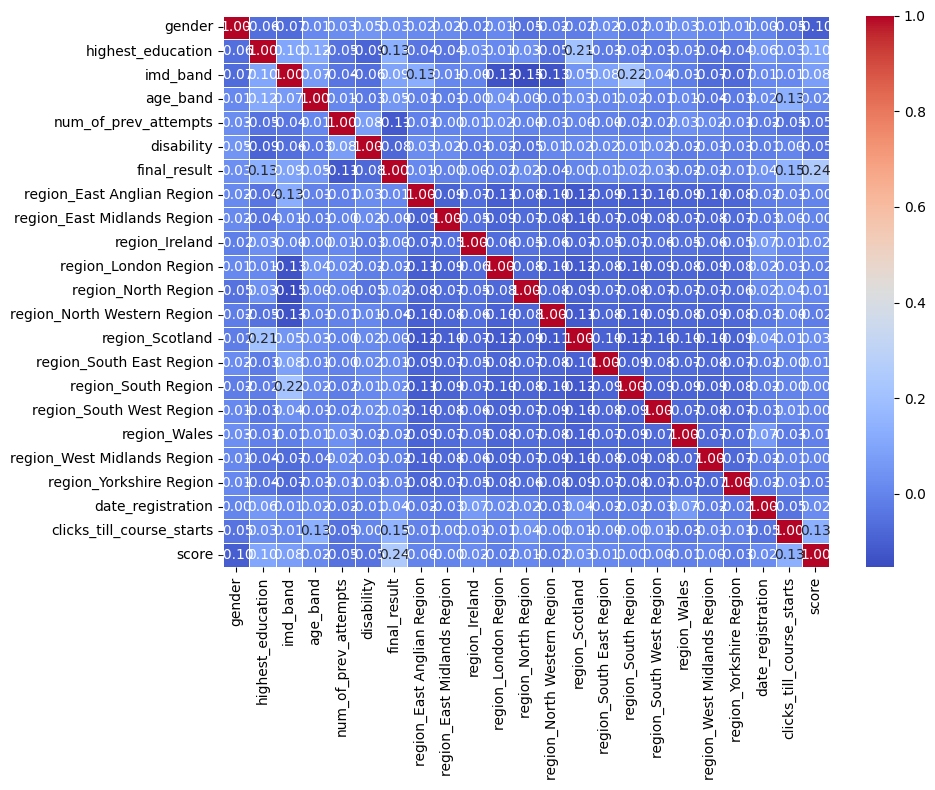

In [548]:
# merged_data.drop(('final_result'), inplace=True, axis=1)
correlation_matrix = merged_data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

plt.tight_layout()
plt.show()

In [549]:
merged_data.drop(['disability'], axis=1, inplace=True)

In [550]:
# merged_data.drop(['num_of_prev_attempts'], axis=1, inplace=True) #za poboljsanje?

### Replikacija rezultata

In [551]:
X = merged_data.drop(columns=['final_result'])  # Sve osim ciljne varijable
y = merged_data['final_result']  # Ciljna varijabla


In [552]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [553]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def my_predict(X, models):
    predictions = []
    for i, model in enumerate(models):
        proba = model.predict_proba(X)[:, 1]
        predictions.append(proba)
    return np.argmax(np.array(predictions).T, axis=1)


models = []
num_classes = len(np.unique(y))

for i in range(num_classes):
    y_i = (y_train == i).astype(int) 
    model = RandomForestClassifier().fit(X_train, y_i)
    models.append(model)

y_pred = my_predict(X_test, models)

accuracy = accuracy_score(y_test, y_pred)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for target_class in [0, 1, 2, 3]:
    y_test_binary = (y_test == target_class).astype(int)
    y_pred_binary = (y_pred == target_class).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
    recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
    f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print(f"Performanse za klasu '{target_class}':")
    print(f"Preciznost: {precision:.2f}")
    print(f"Odziv: {recall:.2f}")
    print(f"F1-mjera: {f1:.2f}")
    print(f"Točnost: {accuracy:.2f}")
    print('------------' * 5)

Performanse za klasu '0':
Preciznost: 0.77
Odziv: 0.79
F1-mjera: 0.77
Točnost: 0.79
------------------------------------------------------------
Performanse za klasu '1':
Preciznost: 0.76
Odziv: 0.79
F1-mjera: 0.77
Točnost: 0.79
------------------------------------------------------------
Performanse za klasu '2':
Preciznost: 0.64
Odziv: 0.59
F1-mjera: 0.58
Točnost: 0.59
------------------------------------------------------------
Performanse za klasu '3':
Preciznost: 0.85
Odziv: 0.88
F1-mjera: 0.86
Točnost: 0.88
------------------------------------------------------------


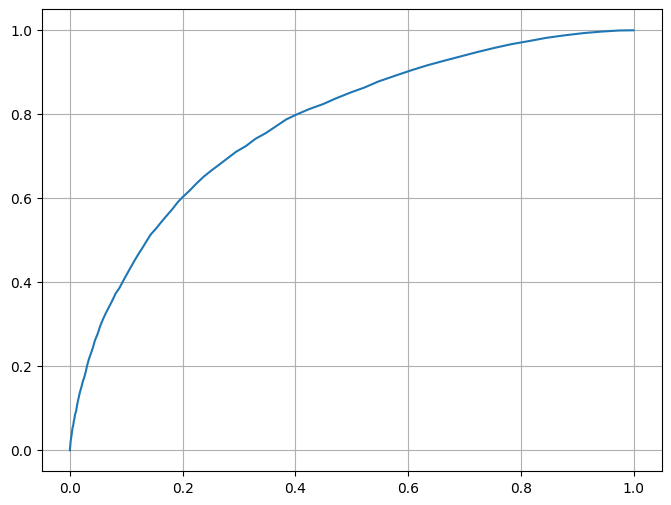

In [554]:
# Računanje ROC krivih i vrednosti AUC za svaku klasu
from sklearn.metrics import roc_auc_score, roc_curve

y_test_binary_all = []
y_score_all = []

for i in range(num_classes):
    y_test_binary = (y_test == i).astype(int) 
    y_score = models[i].predict_proba(X_test)[:, 1]  

    y_test_binary_all.extend(y_test_binary)
    y_score_all.extend(y_score)


fpr, tpr, _ = roc_curve(y_test_binary_all, y_score_all)
auc = roc_auc_score(y_test_binary_all, y_score_all)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.grid()
plt.show()


In [555]:
# poboljsanje dobijemo ako stavimo jos regiju i imd band

In [556]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def my_predict(X, models):
    predictions = []
    for i, model in enumerate(models):
        proba = model.predict_proba(X)[:, 1]
        predictions.append(proba)
    return np.argmax(np.array(predictions).T, axis=1)


models = []
num_classes = len(np.unique(y))

for i in range(num_classes):
    y_i = (y_train == i).astype(int) 
    model = DecisionTreeClassifier().fit(X_train, y_i)
    models.append(model)

y_pred = my_predict(X_test, models)

accuracy = accuracy_score(y_test, y_pred)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for target_class in [0, 1, 2, 3]:
    y_test_binary = (y_test == target_class).astype(int)
    y_pred_binary = (y_pred == target_class).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
    recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
    f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print(f"Performanse za klasu '{target_class}':")
    print(f"Preciznost: {precision:.2f}")
    print(f"Odziv: {recall:.2f}")
    print(f"F1-mjera: {f1:.2f}")
    print(f"Točnost: {accuracy:.2f}")
    print('------------' * 5)


Performanse za klasu '0':
Preciznost: 0.71
Odziv: 0.56
F1-mjera: 0.60
Točnost: 0.56
------------------------------------------------------------
Performanse za klasu '1':
Preciznost: 0.72
Odziv: 0.74
F1-mjera: 0.73
Točnost: 0.74
------------------------------------------------------------
Performanse za klasu '2':
Preciznost: 0.56
Odziv: 0.56
F1-mjera: 0.54
Točnost: 0.56
------------------------------------------------------------
Performanse za klasu '3':
Preciznost: 0.82
Odziv: 0.86
F1-mjera: 0.83
Točnost: 0.86
------------------------------------------------------------


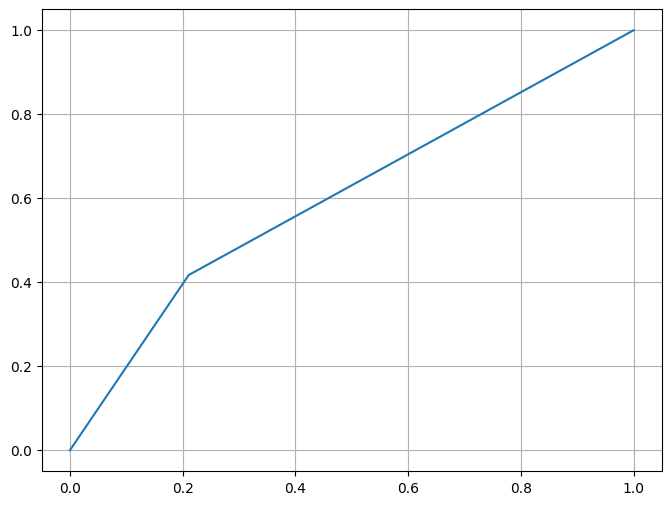

In [557]:
# Računanje ROC krivih i vrednosti AUC za svaku klasu
from sklearn.metrics import roc_auc_score, roc_curve

y_test_binary_all = []
y_score_all = []

for i in range(num_classes):
    y_test_binary = (y_test == i).astype(int) 
    y_score = models[i].predict_proba(X_test)[:, 1]  

    y_test_binary_all.extend(y_test_binary)
    y_score_all.extend(y_score)


fpr, tpr, _ = roc_curve(y_test_binary_all, y_score_all)
auc = roc_auc_score(y_test_binary_all, y_score_all)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.grid()
plt.show()


BART

In [558]:
from bartpy.sklearnmodel import SklearnModel


def my_predict(X, models):
    predictions = []
    for i, model in enumerate(models):
        proba = model.predict(X)
        predictions.append(proba)
    return np.argmax(np.array(predictions).T, axis=1)


models = []
num_classes = len(np.unique(y))

for i in range(num_classes):
    y_i = (y_train == i).astype(int) 
    model = SklearnModel(n_trees=70).fit(X_train, y_i)
    models.append(model)

y_pred = my_predict(X_test, models)

for target_class in [0, 1, 2, 3]:
    y_test_binary = (y_test == target_class).astype(int)
    y_pred_binary = (y_pred == target_class).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
    recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
    f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print(f"Performanse za klasu '{target_class}':")
    print(f"Preciznost: {precision:.2f}")
    print(f"Odziv: {recall:.2f}")
    print(f"F1-mjera: {f1:.2f}")
    print(f"Točnost: {accuracy:.2f}")
    print('------------' * 5)



Starting burn
Starting burn
Starting burn
Starting burn


  1%|          | 2/200 [00:00<00:12, 16.49it/s]s]

Starting sampling
Starting sampling


  3%|▎         | 6/200 [00:00<00:11, 17.14it/s]

Starting sampling
Starting sampling


100%|██████████| 200/200 [00:11<00:00, 17.42it/s]


Starting burn
Starting burn
Starting burn
Starting burn


 98%|█████████▊| 196/200 [00:13<00:00, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/200 [00:00<?, ?it/s]

Starting sampling


100%|██████████| 200/200 [00:13<00:00, 14.65it/s]


Starting burn
Starting burn
Starting burn


  3%|▎         | 6/200 [00:00<00:25,  7.73it/s]

Starting burn


 98%|█████████▊| 197/200 [00:13<00:00, 16.96it/s]

Starting sampling
Starting sampling


  3%|▎         | 6/200 [00:00<00:11, 17.58it/s]s]

Starting sampling


  5%|▌         | 10/200 [00:00<00:10, 18.02it/s]

Starting sampling


100%|██████████| 200/200 [00:12<00:00, 15.70it/s]


Starting burn
Starting burn


  3%|▎         | 6/200 [00:00<00:22,  8.51it/s]

Starting burn
Starting burn


 99%|█████████▉| 198/200 [00:13<00:00, 18.28it/s]

Starting sampling
Starting sampling


  0%|          | 0/200 [00:00<?, ?it/s]

Starting sampling
Starting sampling


100%|██████████| 200/200 [00:11<00:00, 18.16it/s]


Performanse za klasu '0':
Preciznost: 0.71
Odziv: 0.78
F1-mjera: 0.71
Točnost: 0.78
------------------------------------------------------------
Performanse za klasu '1':
Preciznost: 0.74
Odziv: 0.80
F1-mjera: 0.74
Točnost: 0.80
------------------------------------------------------------
Performanse za klasu '2':
Preciznost: 0.64
Odziv: 0.51
F1-mjera: 0.40
Točnost: 0.51
------------------------------------------------------------
Performanse za klasu '3':
Preciznost: 0.77
Odziv: 0.88
F1-mjera: 0.82
Točnost: 0.88
------------------------------------------------------------


/Users/filip/FER/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# POBOLJŠANJE REZULTATA

### Potrebno imati još i regiju te imd_band u značajkama

In [559]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 50, 70, 100],
    'max_depth': [7, 10, 20],
    'min_samples_split': [2, 7, 11],
    'min_samples_leaf': [2, 4, 6]
}

models = []
num_classes = len(np.unique(y))

for i in range(num_classes):
    y_i = (y_train == i).astype(int)
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    
    print(f"Optimizacija za klasu {i}...")
    grid_search.fit(X_train, y_i)
    
    best_model = grid_search.best_estimator_
    print(f"Najbolji parametri za klasu {i}: {grid_search.best_params_}")
    
    models.append(best_model)

y_pred = my_predict(X_test, models)

accuracy = accuracy_score(y_test, y_pred)
print(f"OVR Random Forest accuracy (s optimiziranim modelima): {accuracy:.4f}")


for target_class in [0, 1, 2, 3]:
    y_test_binary = (y_test == target_class).astype(int)
    y_pred_binary = (y_pred == target_class).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
    recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
    f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print(f"Performanse za klasu '{target_class}':")
    print(f"Preciznost: {precision:.2f}")
    print(f"Odziv: {recall:.2f}")
    print(f"F1-mjera: {f1:.2f}")
    print(f"Točnost: {accuracy:.2f}")
    print('------------' * 5)

Optimizacija za klasu 0...
Najbolji parametri za klasu 0: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}
Optimizacija za klasu 1...
Najbolji parametri za klasu 1: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}
Optimizacija za klasu 2...
Najbolji parametri za klasu 2: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimizacija za klasu 3...
Najbolji parametri za klasu 3: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
OVR Random Forest accuracy (s optimiziranim modelima): 0.4300
Performanse za klasu '0':
Preciznost: 0.73
Odziv: 0.56
F1-mjera: 0.59
Točnost: 0.56
------------------------------------------------------------
Performanse za klasu '1':
Preciznost: 0.79
Odziv: 0.81
F1-mjera: 0.74
Točnost: 0.81
------------------------------------------------------------
Performanse za klasu '2':
Preciznost: 0.61
Odziv: 0.61
F1-mjera: 0.61
Točn

In [560]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def my_predict(X, models):
    predictions = []
    for i, model in enumerate(models):
        proba = model.predict_proba(X)[:, 1]
        predictions.append(proba)
    return np.argmax(np.array(predictions).T, axis=1)

models = []
num_classes = len(np.unique(y))

trainAccs, testAccs, depths = [], [], []

for i in range(num_classes):
    y_i = (y_train == i).astype(int)
    
    maxAccTrain = 0
    maxAccTest = 0
    best_depth = None
    
    for depth in range(1, 11): 
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_i)
        
        train_acc = model.score(X_train, y_i)
        test_acc = model.score(X_test, y_test)
        
        if test_acc > maxAccTest:
            maxAccTest = test_acc
            maxAccTrain = train_acc
            best_depth = depth
            
    depths.append(best_depth)
    trainAccs.append(maxAccTrain)
    testAccs.append(maxAccTest)
    
    final_model = DecisionTreeClassifier(max_depth=best_depth)
    final_model.fit(X_train, y_i)
    models.append(final_model)

print(f"Prosječna točnost na skupu za treniranje: {np.mean(trainAccs):.2f}")
print(f"Prosječna točnost na test skupu: {np.mean(testAccs):.2f}")

print("Sažetak dubina: (dubina - broj ponavljanja)")
print(pd.Series(depths).value_counts())

y_pred = my_predict(X_test, models)

for target_class in range(num_classes):
    y_test_binary = (y_test == target_class).astype(int)
    y_pred_binary = (y_pred == target_class).astype(int)

    precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
    recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
    f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print(f"Performanse za klasu '{target_class}':")
    print(f"Preciznost: {precision:.2f}")
    print(f"Odziv: {recall:.2f}")
    print(f"F1-mjera: {f1:.2f}")
    print(f"Točnost: {accuracy:.2f}")
    print('------------' * 5)


Prosječna točnost na skupu za treniranje: 0.78
Prosječna točnost na test skupu: 0.22
Sažetak dubina: (dubina - broj ponavljanja)
1     1
9     1
10    1
6     1
Name: count, dtype: int64
Performanse za klasu '0':
Preciznost: 0.70
Odziv: 0.76
F1-mjera: 0.71
Točnost: 0.76
------------------------------------------------------------
Performanse za klasu '1':
Preciznost: 0.73
Odziv: 0.77
F1-mjera: 0.74
Točnost: 0.77
------------------------------------------------------------
Performanse za klasu '2':
Preciznost: 0.59
Odziv: 0.54
F1-mjera: 0.50
Točnost: 0.54
------------------------------------------------------------
Performanse za klasu '3':
Preciznost: 0.83
Odziv: 0.87
F1-mjera: 0.84
Točnost: 0.87
------------------------------------------------------------
